<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Kares_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keras Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
y = df["price"].values
X = df.drop("price", axis=1).values

##Train/Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Scale

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Import Keras

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

In [27]:
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

[optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

[losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

In [28]:
model.compile(optimizer='rmsprop', loss='mse')

In [29]:
model.fit(x=X_train_scaled, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256711.3906
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256660.2031
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256607.6562
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256544.9844
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256470.8125
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256383.7656
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256279.8125
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256155.9531
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 256004.2031
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255818.7812
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 255593.2969
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

In [30]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

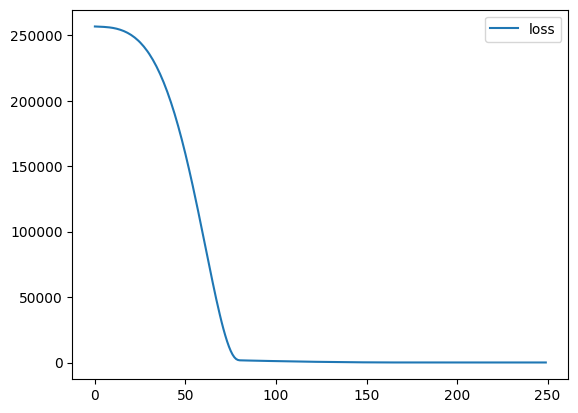

In [31]:
loss_df.plot()

In [32]:
model.evaluate(X_test_scaled, y_test, verbose=0)

26.096593856811523

##Predict

In [33]:
test_preds = model.predict(X_test_scaled)

10/10 [==============================] - 0s 2ms/step


##Create DataFrame

In [35]:
test_preds.shape

(300, 1)

In [42]:
test_preds = pd.DataFrame(test_preds.reshape(300,))

In [45]:
preds_df = pd.DataFrame(y_test)

In [46]:
preds_df = pd.concat([preds_df, test_preds], axis=1)

In [47]:
preds_df.columns = ["True y", "Predictions"]

In [48]:
preds_df.head()

,True y,Predictions
0,402.296319,406.040253
1,624.156198,624.747314
2,582.455066,593.290710
3,578.588606,573.287720
4,371.224104,367.211945


<Axes: xlabel='Predictions', ylabel='True y'>

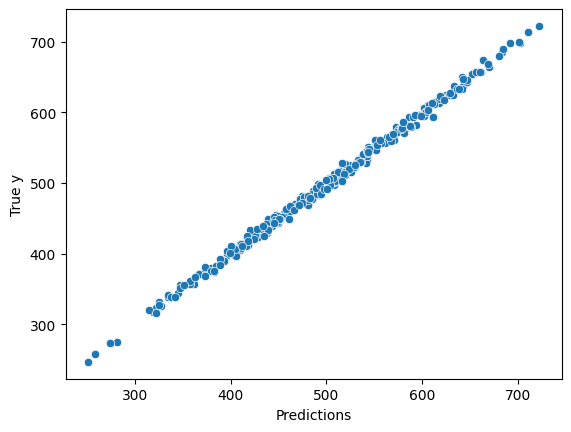

In [49]:
sns.scatterplot(x="Predictions", y="True y", data=preds_df)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
mean_absolute_error(preds_df["True y"],preds_df["Predictions"])

4.132803039193371

In [52]:
preds_df.describe()

,True y,Predictions
count,300.000000,300.000000
mean,500.375339,501.414368
std,93.922502,94.191536
min,246.739720,251.252945
25%,435.220788,437.104668
50%,502.979961,504.610184
75%,567.451939,568.643372
max,722.263944,722.355469


In [53]:
np.sqrt(mean_squared_error(preds_df["True y"],preds_df["Predictions"]))

5.108482227701409

##Save And Load Model

In [54]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
from tensorflow.keras.models import load_model

In [56]:
loaded_model = load_model("my_model.h5")